## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Project Supervised Learning - Thera Bank Personal Loan Campaign
<a id='shape'></a>

Develope a machine learning classification model to target 'Thera Banks Personal Loan Campaign' towards the right set of customers. The project will make use of past data available on the banking customers who have responded and not responded to a personal loan campaign, as training data to predict the probability that a customer will respond to a future campaign. 

###  Load the libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(color_codes=True)
%matplotlib inline

###  Import data files as data frames 

In [2]:
Bank_Data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
Bank_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Data Quality Checks

In [4]:
Bank_Data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing values in the dataset.

In [5]:
Bank_Data.shape

(5000, 14)

In [6]:
Bank_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


- From the above analysis, we note certain anomalies in which there are negative years of experience recorded in the data. We can assume that this is a data input error, as years of experience must be positive (not possible to have a negative value for years of experience). To correct the error in the data we must replace the negative years of Experience recorded within the data with their absolute values.

#### Replace the negative years of experience recorded in the data with their absolute values: 

First check all negative years of experience recorded in the data:

In [7]:
Bank_Data[Bank_Data['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [8]:
Bank_Data['Experience'] = Bank_Data['Experience'].abs()

In [9]:
Bank_Data[Bank_Data['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Confirm all the negative years of experience recorded have been changed to their absolute values and no more negative inputs have been included in the data:

In [10]:
Bank_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


 <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Exploratory Data Analytics (EDA) 

### Univariate Analysis:
Display univariate plots of the attributes: 'Age', 'Credit Card Average Spending','Income', 'Education', 'Family, 'Mortgage' and 'Experiance', from the respective Banking Data

In [11]:
EDA_Columns = list(Bank_Data)[1:-10] + list(Bank_Data)[5:-5]
print(EDA_Columns)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']


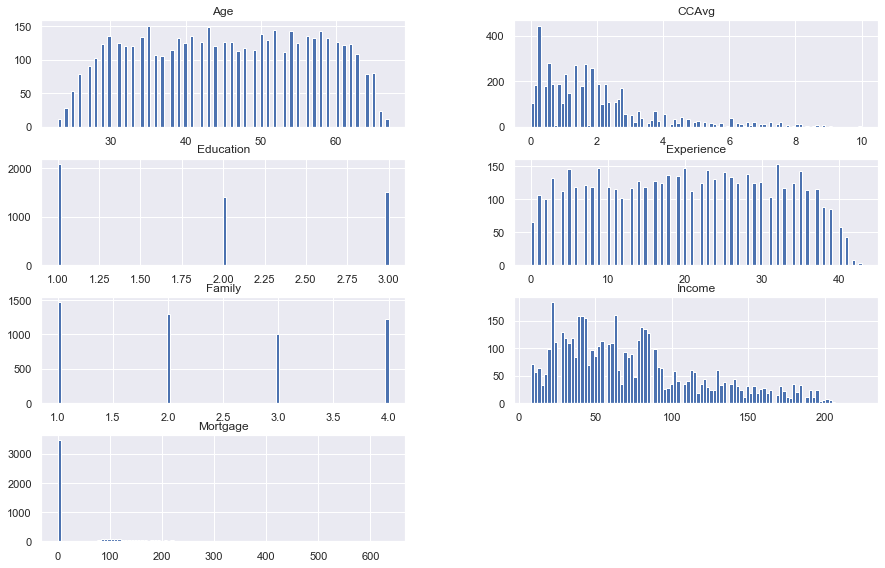

In [12]:
Bank_Data[EDA_Columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2)); 
# Histogram of first 8 columns

Histogram plots for important independent numeric variables

#### Univariate Analysis Age

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


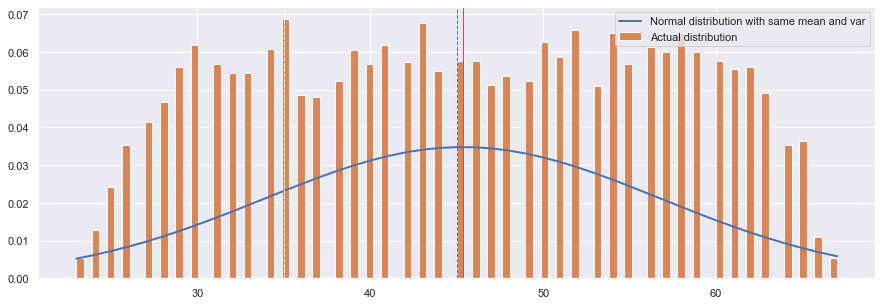

In [13]:
r = np.asarray(Bank_Data['Age'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Bank_Data['Age'].mean(), color='r', linewidth=1)
plt.axvline(Bank_Data['Age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Bank_Data['Age'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

##### Analysis Banking Customer data:
Some features of the Bank's Customers age include: 
- Mean Age: 45
- Minimum Customer Age: 23
- Maximum Customer Age: 67 
- From the above analysis we can see the majority of the banks customers are aged between 35 and 55 years of age 
- There are some outliers, however the age of the banks customers mostly follows a normal distribution.

#### Univariate Analysis Income

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


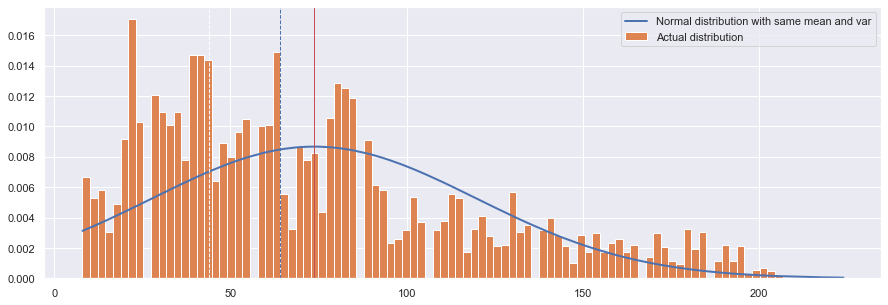

In [14]:
r = np.asarray(Bank_Data['Income'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Bank_Data['Income'].mean(), color='r', linewidth=1)
plt.axvline(Bank_Data['Income'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Bank_Data['Income'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

##### Analysis Banking Customer data:
Some features of the Bank's Customers Income include: 
- Mean Income: (USD) 73 774
- Minimum Income: (USD) 8 000
- Maximum Income: (USD) 224 000 
- From the above analysis we can see income distribution is slightly skewed towards the lower dispoasl income ranges
- There are outliers, and an extreme range in the income distribution. 

#### Univariate Analysis Credit Card Avg Spending

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


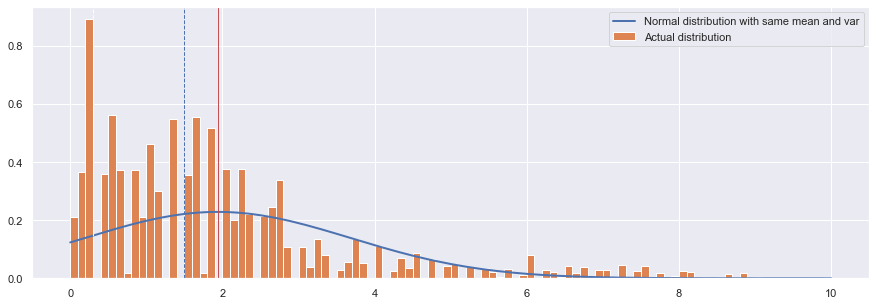

In [15]:
r = np.asarray(Bank_Data['CCAvg'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Bank_Data['CCAvg'].mean(), color='r', linewidth=1)
plt.axvline(Bank_Data['CCAvg'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Bank_Data['CCAvg'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

##### Analysis Banking Customer data:
Some features of the Bank's Customers average spending on credit cards per month ($000) include: 
- Minimum Credit Card Spending: (USD) 0 
- Mean Credit Card Spending: (USD) 1 937
- Maximum Credit Card Spending: (USD) 10 000 
- From the above analysis we can see that 50% of the banks customers have a credit card spending capacity between (USD) 700 [25% quartile mark] and (USD) 2 500 [75% quartile mark], this gives an indication of customer spending that could be potentially financed by way of a Personal Loan. 
- Furthermore customers with no Credit Card spending could be looking to finance their spending with a Personal Loan as opposed to Credit financing.

#### Univariate Analysis Experience

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


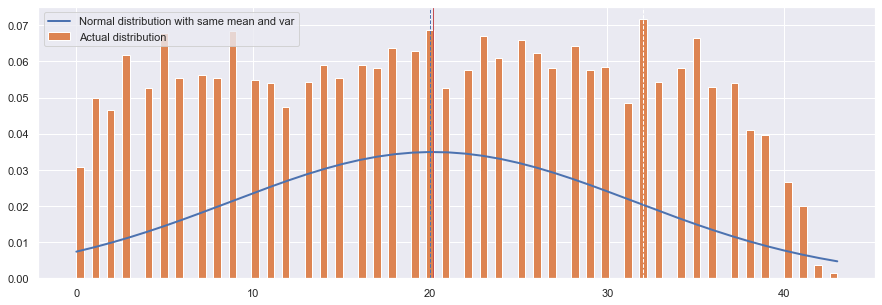

In [16]:
r = np.asarray(Bank_Data['Experience'])
r = sorted(r)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(r, np.mean(r), np.std(r)) 
 
#plot both series on the histogram
plt.figure(figsize=(15,5))
plt.plot(r,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(r,normed=True,bins = 100,label="Actual distribution")     
plt.axvline(Bank_Data['Experience'].mean(), color='r', linewidth=1)
plt.axvline(Bank_Data['Experience'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(Bank_Data['Experience'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()

#### Analysis Banking Customer data:
Some features of the Bank's Customers year's of Experiance: 
- Minimum years of experiance: 0 years
- Mean years of Experience : 20 Years
- Maximum years of Experience : 43 years 

- From the above analysis we can note experiance is closely correlated with Age and thus also mostly follows a normal distribution .

### Bivariate Analysis

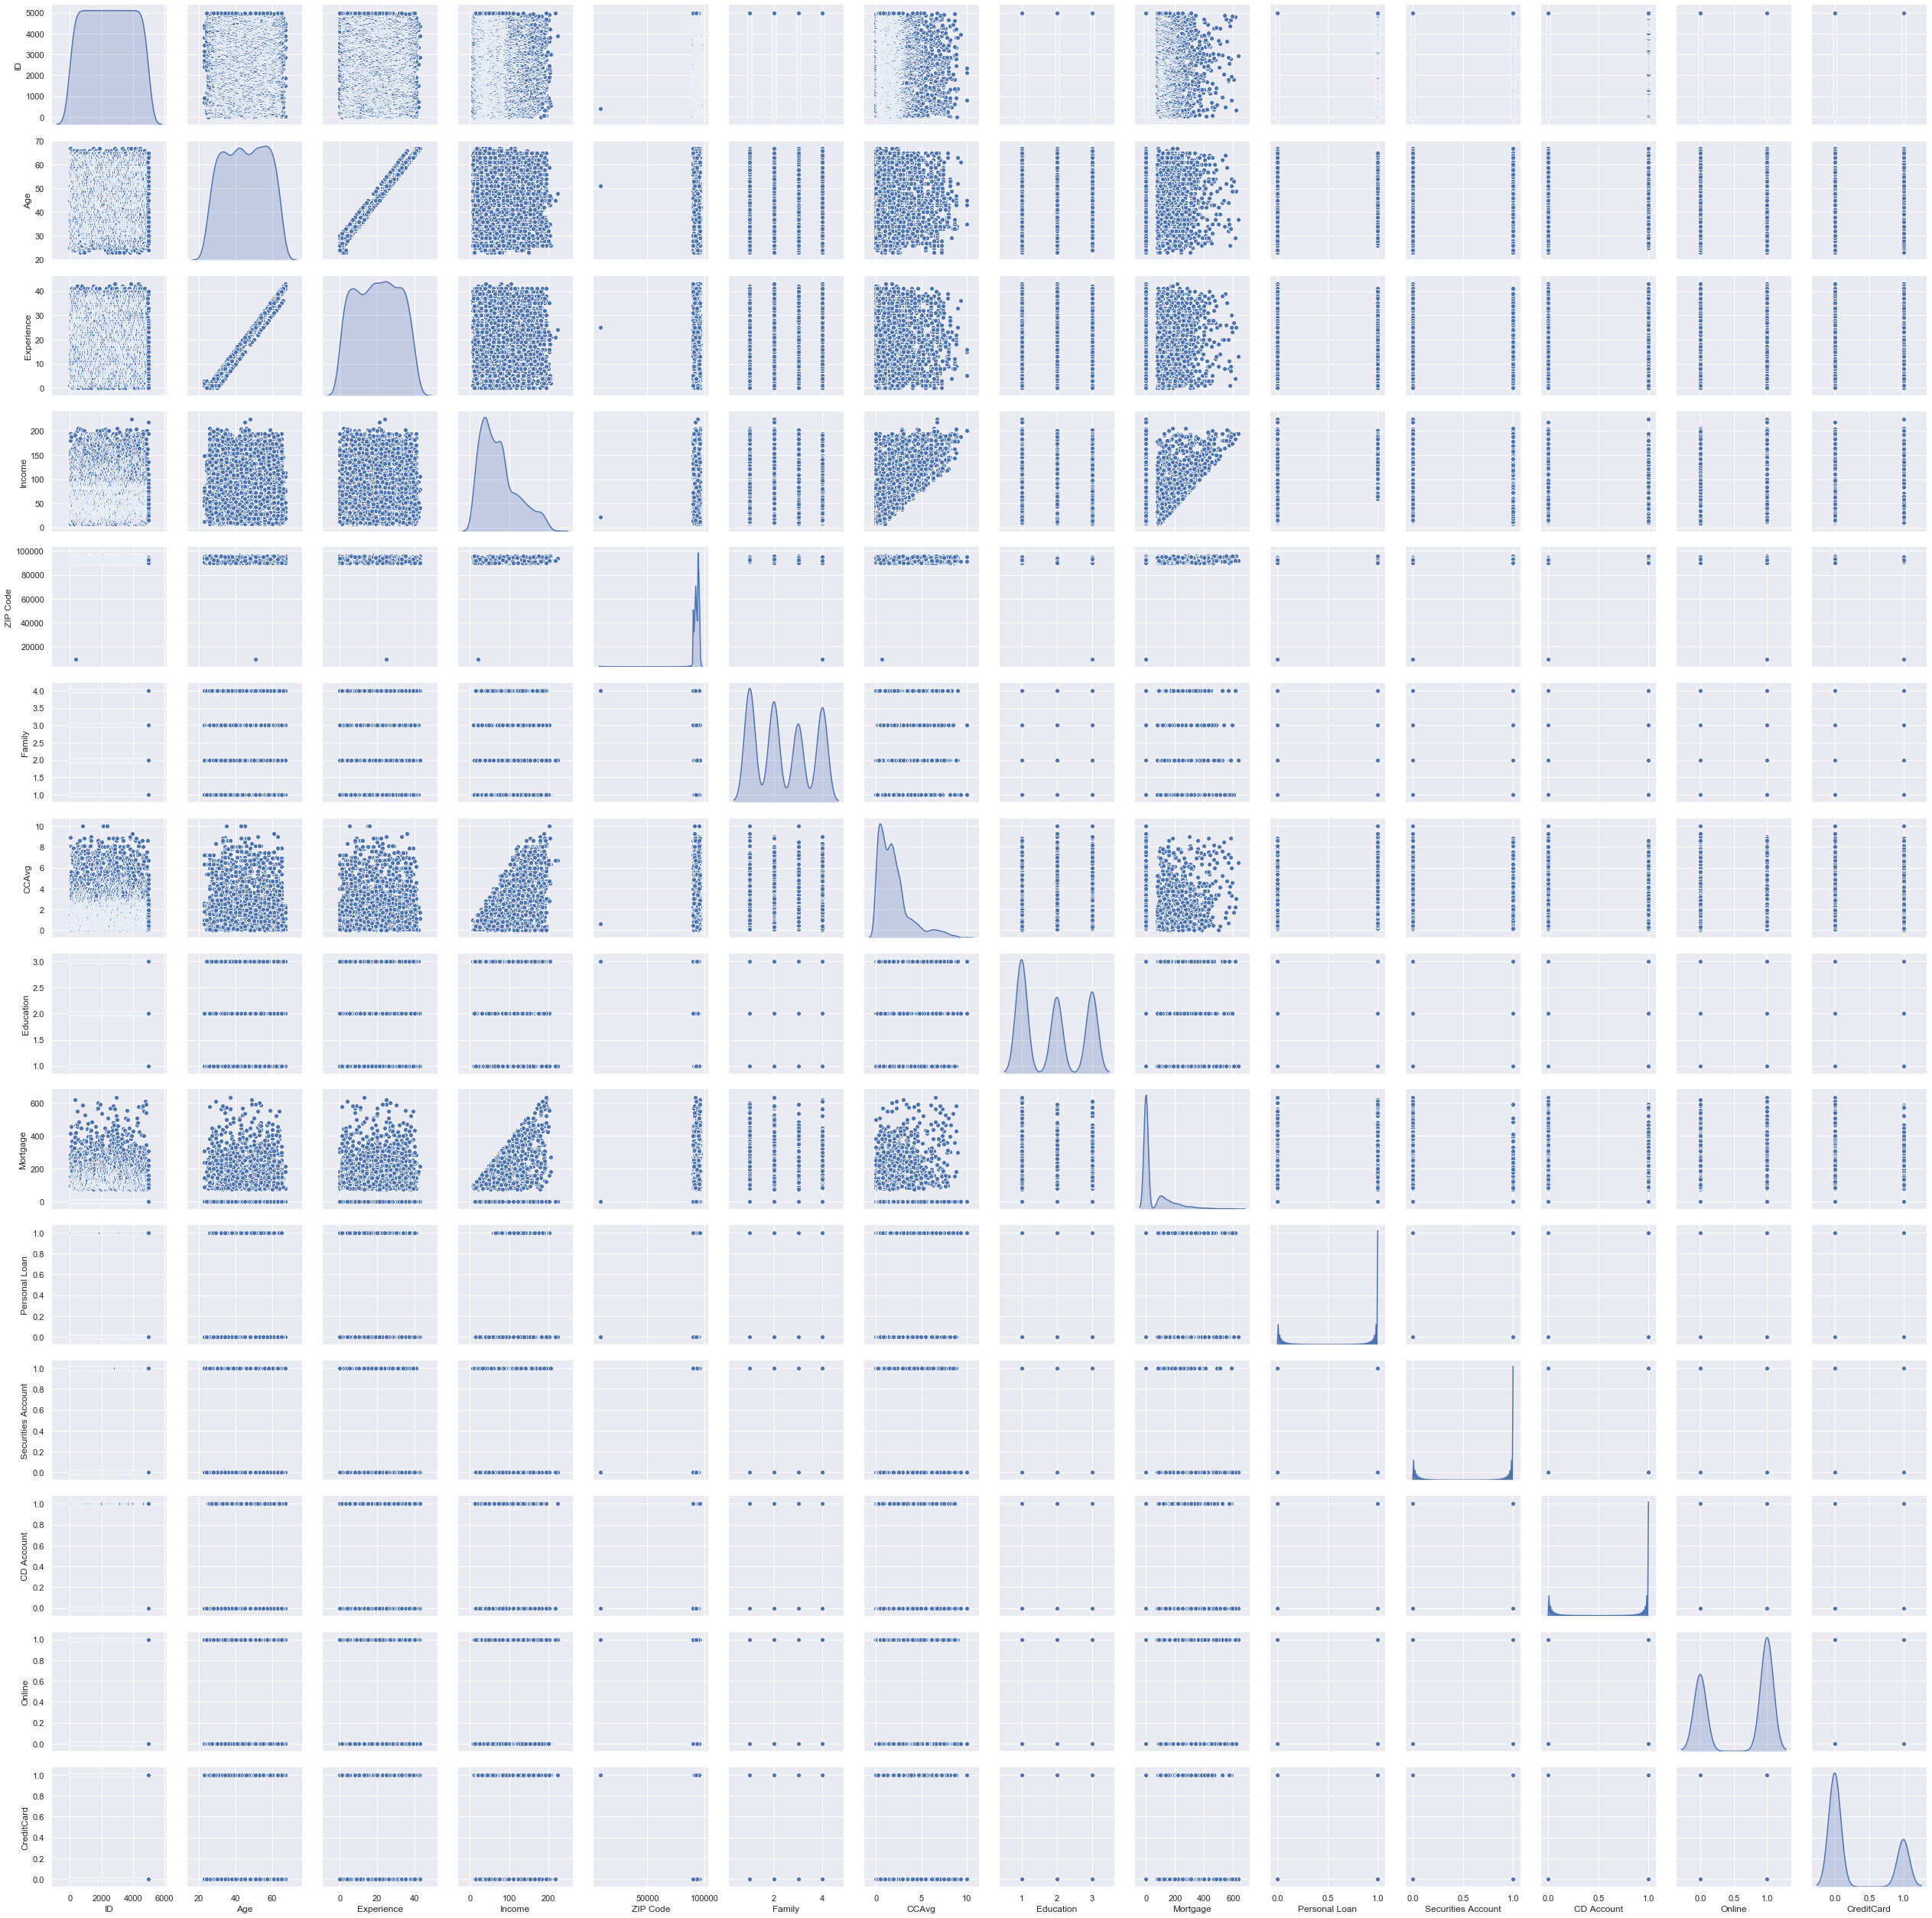

In [17]:
sns.pairplot(Bank_Data,diag_kind='kde')

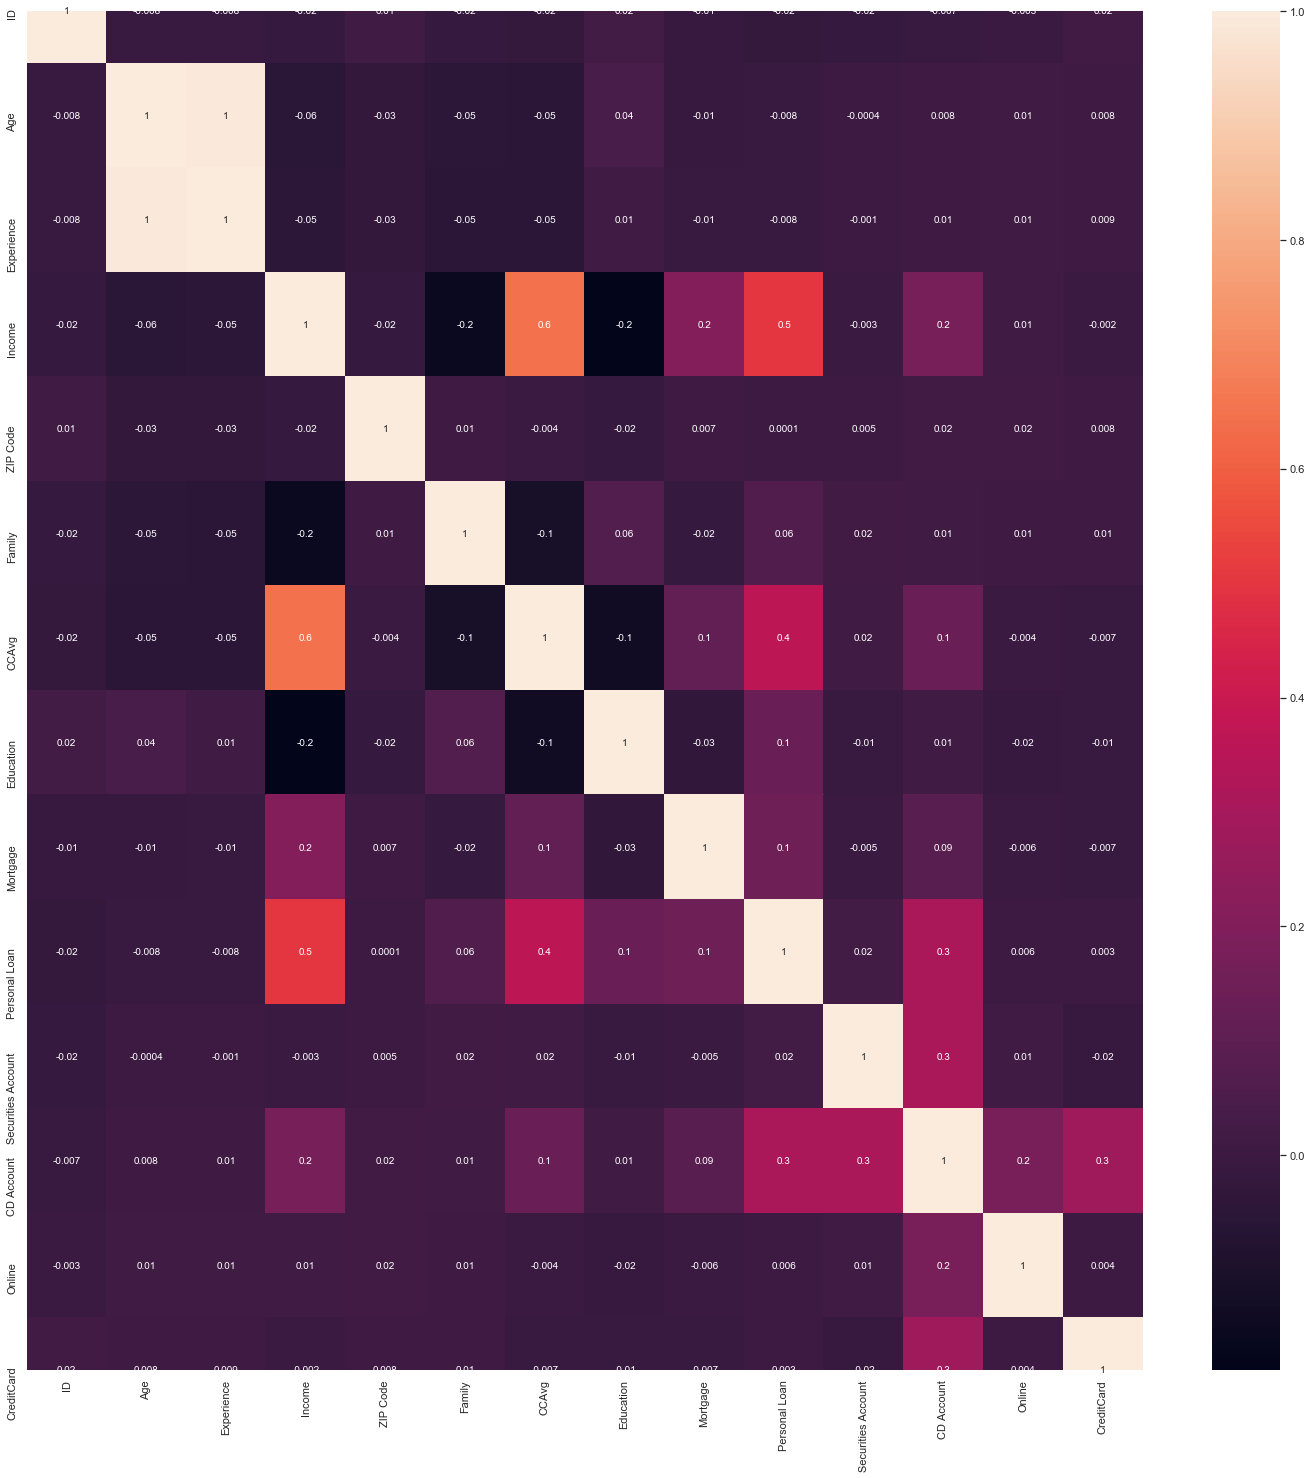

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(Bank_Data.corr(), annot = True, fmt='.1g')

#### Analysis of correlation heatmap:
 
Overall Observations:
- Age and 'years of Experience' are directly correlated. This is a logical relationship and requires no further analysis. 
- Furthermore age and 'Education level' also appear to have a directly correlated relationship, within a certain age extent (most likely after mid twenties when university education is mostly completed).  
 
Personal Loan (target variable) - Correlation Analysis:
- There appears to be an interesting correlation between the Customers disposable income and response to the previous Personal Loan campaign. This will be explored further in the below boxplot analysis. We further note that income is also strongly correlated with average Credit Card spending per month and thus there is likely a linkage between Credit Card spending and the a Personal Loan campaign. 
- There also appears to be an unexpected correlation relationship between customers who hold a certificate of deposit (CD) account and those customers whom positively responded to the previous Personal Loan campaign when compared with customers who do not hold any a certificate of deposit (CD). This will be explored further in the below countplot analysis.

### Bivariate analysis

Boxplot for numeric variables vs Target Variable (Pesonal Loan)


#### Boxplot Age vs Personal Loan

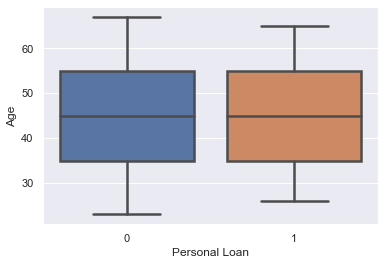

In [19]:
sns.boxplot(x="Personal Loan", y="Age", data=Bank_Data, linewidth=2.5)

##### Age vs Target Variable 

(responded to loan campaign = 1; Did not respond to loan campaign = 0)

The median age of customers who responded to the campaign is slightly higher than the age of those who didn’t respond. There is not much differentiation though between the two classes based on Age

#### Boxplot Education vs Personal Loan

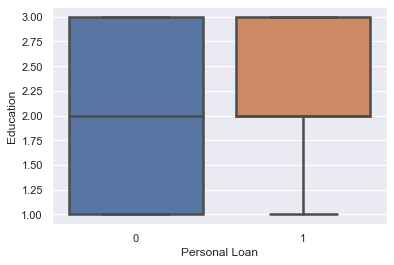

In [20]:
sns.boxplot(x="Personal Loan", y="Education", data=Bank_Data, linewidth=2.5)

##### Education vs Target Variable 

(responded to loan campaign = 1; Did not respond to loan campaign = 0)

There is a significant differentiation between the customers whom responded to the Personal Loan campaign on the basis of level of Education status obtained. It is clear that the customers with higher levels of education responded more favourably to the previous Personal Loan campaign. 

#### Boxplot Family vs Personal Loan

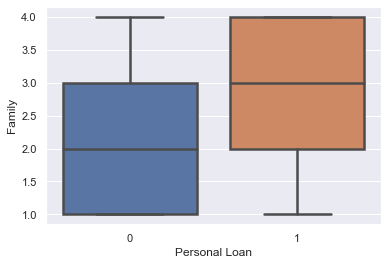

In [21]:
sns.boxplot(x="Personal Loan", y="Family", data=Bank_Data, linewidth=2.5)

##### Family vs Target Variable 

(responded to loan campaign = 1; Did not respond to loan campaign = 0)

The mean family size of customers who responded to the campaign is significantly higher than the average family size of those who didn’t respond. There appears to be definite correlation between family size and response to a personal loan campaign.  


#### Boxplot Income vs Personal Loan

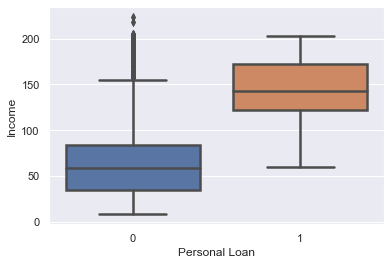

In [22]:
sns.boxplot(x="Personal Loan", y="Income", data=Bank_Data, linewidth=2.5)

##### Income vs Target Variable 

(responded to loan campaign = 1; Did not respond to loan campaign = 0)

The mean income (Salary income) of customers who responded to the campaign is significantly higher than the average Salary Income size of those who didn’t respond. There appears to be definite correlation between Income size and response to a personal loan campaign. The higher salaried and more professional customers form majority of the targeted customers for the Personal Loan Campaign. 

#### Boxplot Credit Card Avg Spending vs Personal Loan

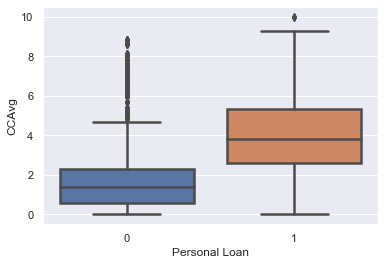

In [23]:
sns.boxplot(x="Personal Loan", y="CCAvg", data=Bank_Data, linewidth=2.5)

##### Credit Card Avg Spending vs Target Variable 

(responded to loan campaign = 1; Did not respond to loan campaign = 0)

Those customers who had higher average Credit Card spending per month were more interested in availing the Personal Loan when compared with customers who didn’t have high monthly credit card spending.

#### Boxplot Mortgage vs Personal Loan

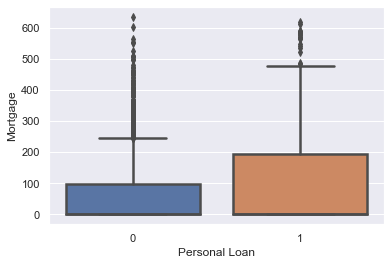

In [24]:
sns.boxplot(x="Personal Loan", y="Mortgage", data=Bank_Data, linewidth=2.5)

##### Mortgage vs Target Variable 

(responded to loan campaign = 1; Did not respond to loan campaign = 0)

The customers with higher Mortgages responded more favourably to the previous Personal Loan campaign when compared with customers lower Mortgages or who didn’t have Mortgages.

### Bar plot for important categorical variables

#### Securities Account:

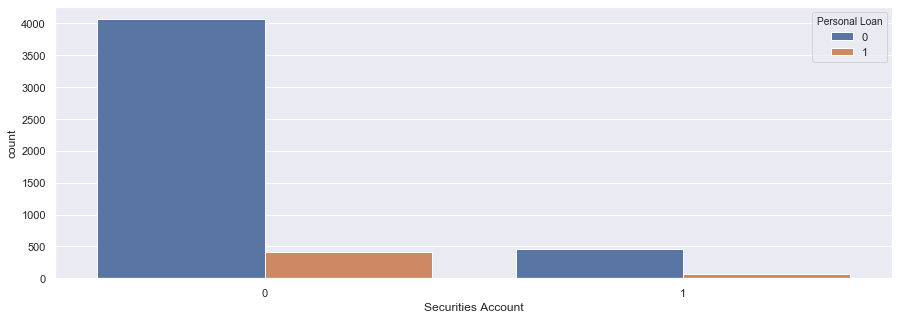

Percentage of Personal Loan Customers that also hold Securities Account    :  12.5
Percentage of overall customers that hold Securities Accounts    :  10.440000000000001


In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='Personal Loan', x= 'Securities Account')
plt.show()

print("Percentage of Personal Loan Customers that also hold Securities Account    : ",len(Bank_Data[(Bank_Data['Personal Loan'] == 1) & (Bank_Data['Securities Account'] == 1)].index) / len(Bank_Data.loc[Bank_Data['Personal Loan'] == 1])*100)
print("Percentage of overall customers that hold Securities Accounts    : ",len(Bank_Data[(Bank_Data['Securities Account'] == 1)].index)/ len(Bank_Data['Securities Account'].index)*100)

#### Analaysis
There is an almost even split between the respondents that hold a Securities Account and those that don’t. 

#### Certificate of deposit (CD) account:

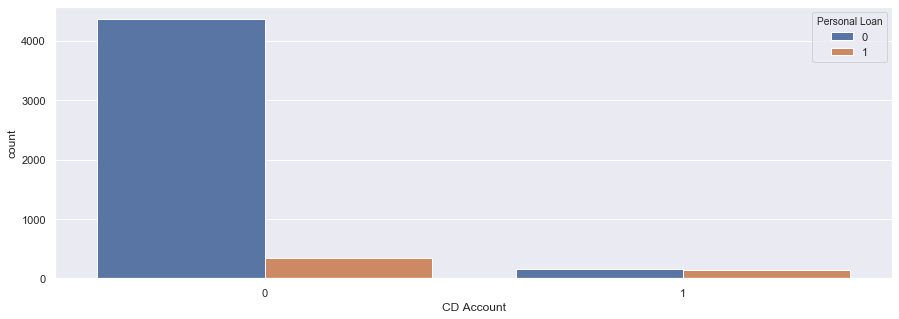

Percentage of Personal Loan Customers that also hold a certificate of deposit (CD) account with the bank    :  29.166666666666668
Percentage of overall customers that hold certificate of deposit (CD) account with the bank    :  6.04


In [26]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='Personal Loan', x= 'CD Account')
plt.show()

print("Percentage of Personal Loan Customers that also hold a certificate of deposit (CD) account with the bank    : ",len(Bank_Data[(Bank_Data['Personal Loan'] == 1) & (Bank_Data['CD Account'] == 1)].index) / len(Bank_Data.loc[Bank_Data['Personal Loan'] == 1])*100)
print("Percentage of overall customers that hold certificate of deposit (CD) account with the bank    : ",len(Bank_Data[(Bank_Data['CD Account'] == 1)].index)/ len(Bank_Data['CD Account'].index)*100)

#### Analaysis
Those customers who held a certificate of deposit (CD) account with the bank were significantly more interested in the previous Personal Loan campaign when compared with customers who do not hold any a certificate of deposit (CD). 

#### Credit Card:

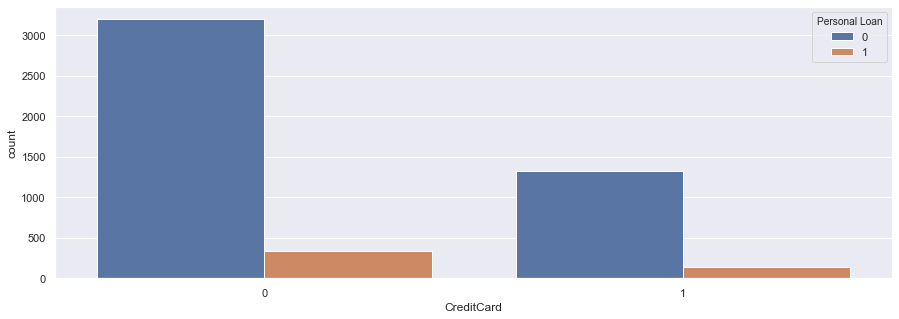

Percentage of Personal Loan Customers that hold Credit Cards    :  29.791666666666668
Percentage of overall customers that hold Credit Cards    :  29.4


In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='Personal Loan', x= 'CreditCard')
plt.show()

print("Percentage of Personal Loan Customers that hold Credit Cards    : ",len(Bank_Data[(Bank_Data['Personal Loan'] == 1) & (Bank_Data['CreditCard'] == 1)].index) / len(Bank_Data.loc[Bank_Data['Personal Loan'] == 1])*100)
print("Percentage of overall customers that hold Credit Cards    : ",len(Bank_Data[(Bank_Data['CreditCard'] == 1)].index)/ len(Bank_Data['CreditCard'].index)*100)

#### Analaysis
There is an almost even split between the respondents that hold a Credit Card facility and those that don’t. 

#### Online Banking:

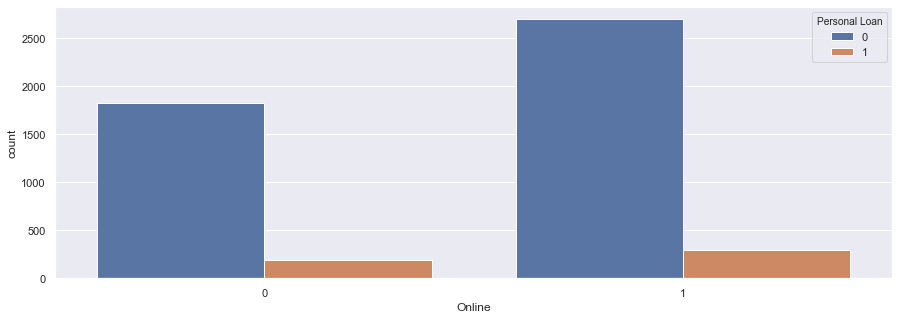

Percentage of Personal Loan Customers that make use of internet banking facilities   :  60.62499999999999
Percentage of overall customers that make use of internet banking facilities    :  59.68


In [28]:
plt.figure(figsize=(15,5))
sns.countplot(data=Bank_Data, hue ='Personal Loan', x= 'Online')
plt.show()

print("Percentage of Personal Loan Customers that make use of internet banking facilities   : ",len(Bank_Data[(Bank_Data['Personal Loan'] == 1) & (Bank_Data['Online'] == 1)].index) / len(Bank_Data.loc[Bank_Data['Personal Loan'] == 1])*100)
print("Percentage of overall customers that make use of internet banking facilities    : ",len(Bank_Data[(Bank_Data['Online'] == 1)].index)/ len(Bank_Data['Online'].index)*100)

#### Analaysis
On average more than 60% of all respondents make use of online banking.

## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [29]:
from sklearn.model_selection import train_test_split

X = Bank_Data.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = Bank_Data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


Lets check split of data

In [30]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(Bank_Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(Bank_Data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check Personal Loan True/False ratio in split data 

In [31]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data['Personal Loan'] == 1]), (len(Bank_Data.loc[Bank_Data['Personal Loan'] == 1])/len(Bank_Data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data['Personal Loan'] == 0]), (len(Bank_Data.loc[Bank_Data['Personal Loan'] == 0])/len(Bank_Data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



The split of data between training data and testing data appears appropriate from the above quality checks performed. 

# Logistic Regression Model

In [32]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000037 -0.000526 -0.001712  0.036101 -0.000064  0.008582  0.005776   

         7        8         9        10        11        12  intercept  
0  0.00933  0.00086  0.000303  0.002689 -0.000092 -0.000031   -0.00006  


In [33]:
#Creating a mapping of the values of the coefficients to names
coef_list = {}
for i in range(12):
    coef_list[list(X.columns)[i]] = np.asscalar(pd.DataFrame(model.coef_)[i].values)#Sorting the resulting dictionary in descending order
sorted(coef_list.items(), key=lambda x: -x[1])

[('Income', 0.036100564032839406),
 ('Education', 0.009329878908764869),
 ('Family', 0.008581511783498835),
 ('CCAvg', 0.005775976194053736),
 ('CD Account', 0.0026888884639043485),
 ('Mortgage', 0.0008595296462467326),
 ('Securities Account', 0.00030252800279736183),
 ('ID', -3.654217820177021e-05),
 ('ZIP Code', -6.445695701389713e-05),
 ('Online', -9.223584244858565e-05),
 ('Age', -0.0005264723310222449),
 ('Experience', -0.001711969229141146)]

#### Evaluating the Model Score on Test Data

In [34]:
model_score = model.score(x_test, y_test)
print(model_score)

0.908


### Confusion matrix the above model 

Text(0.5, 257.44, 'Predicted Personal Loan')

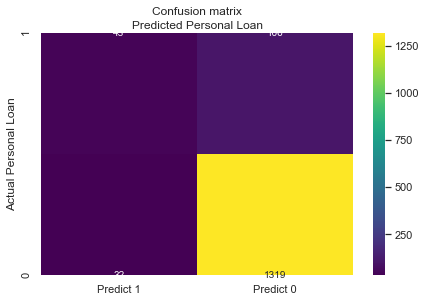

In [35]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

fig, ax = plt.subplots()
tick_marks = np.arange(len("Predict")) 
plt.xticks(tick_marks, "Predict 1")
plt.yticks(tick_marks, "Predict 0")
sns.heatmap(pd.DataFrame(df_cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Personal Loan')
plt.xlabel('Predicted Personal Loan')

In [36]:
#Creating the confusion matrix
pd.crosstab(y_test, model.predict(x_test), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1319,32,1351
1,106,43,149
All,1425,75,1500


In [37]:
#Creating the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



### ROC Curve for the above model 

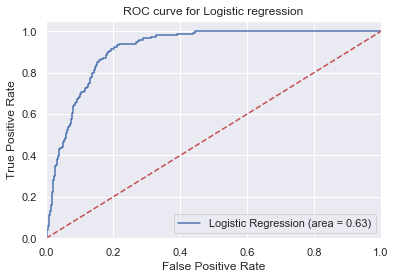

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test)) #Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1]) #Plotting the curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic regression')
plt.legend(loc="lower right")
plt.show()

# Random Forrest Model

In [39]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_model.fit (x_train, y_train);

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state =1, max_depth= 3)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
y_pred = classifier.predict(x_test)

#### Evaluating the Model Score on Test Data

In [42]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.926


### Confusion matrix the above Random Forrest model 

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1351,    0],
       [ 111,   38]], dtype=int64)

Text(0.5, 257.44, 'Predicted Personal Loan')

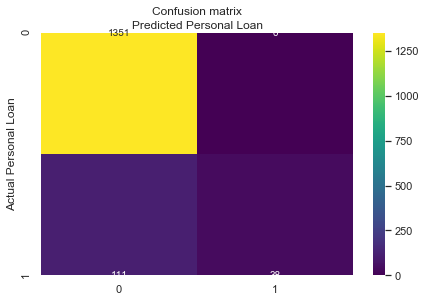

In [44]:
fig, ax = plt.subplots()
tick_marks = np.arange(len("Predict")) 
plt.xticks(tick_marks, "Predict 1")
plt.yticks(tick_marks, "Predict 0")
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Personal Loan')
plt.xlabel('Predicted Personal Loan')

In [45]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1351
           1       1.00      0.26      0.41       149

    accuracy                           0.93      1500
   macro avg       0.96      0.63      0.68      1500
weighted avg       0.93      0.93      0.91      1500

0.926


# Reasoning on how the model may perform better:

Logistic Regression is also not one of the most powerful algorithms out there and can be easily outperformed by more complex ones.

##### How can the model perform better:

If we want to improve our model, we could try:
- Try different models - Logistic Regression is also not one of the most powerful algorithms out there and can be easily outperformed by more complex ones. This has been demonstrated above in the fact the Random Forrest model outperformed the Logistic Regression model in terms of both accuracy score and f1-score of the model.  
- Try multiple Logistic Regressions algorithms - by building multiple Logistic Regressions using variations of the original dataset, we can improve the performance of our Logistic Regression models considerably. 
- Quality of data - We could improve the model by gathering more data or better quality data (expand the variables in the data or extend the sample size of our data).